<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/GAM_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install pygam
!pip install pytimetk

In [39]:
import pandas as pd
from pygam import s,ExpectileGAM
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
# Чтение файла Excel
df = pd.read_excel('/content/Сыр плавленый Карат Дружба Ванночки 400 г 45,0%.xlsx')

df_all = pd.read_excel('/content/df_Сыр плавленый Карат Дружба Ванночки 400 г 45,0%.xlsx')
# Вывод первых нескольких строк DataFrame

[  0.    14.32  28.64  42.96  57.28  71.6   85.92 100.24 114.56 128.88
 143.2 ]


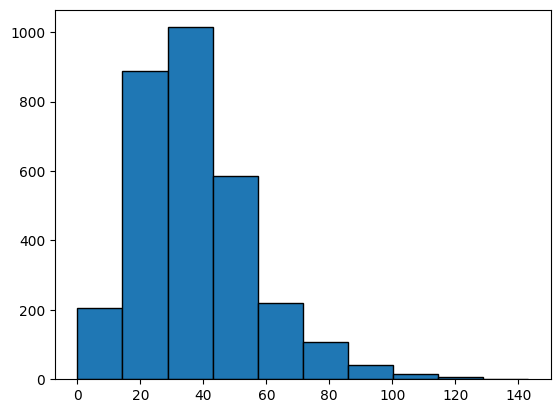

In [40]:


counts, bin_edges, _ = plt.hist(df["SALES VOL"], bins=10, edgecolor='black')
print(bin_edges)


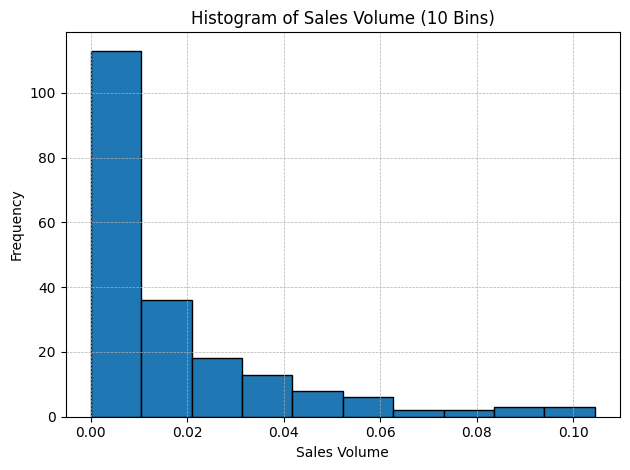

Интервалы бинов share vol 0.0 0.03132477702849684
количево код тт 22
['38BK', '33M1', '4699', 'X852', 'G273', '38G3', '9037', 'H798', '7615', '38BI']


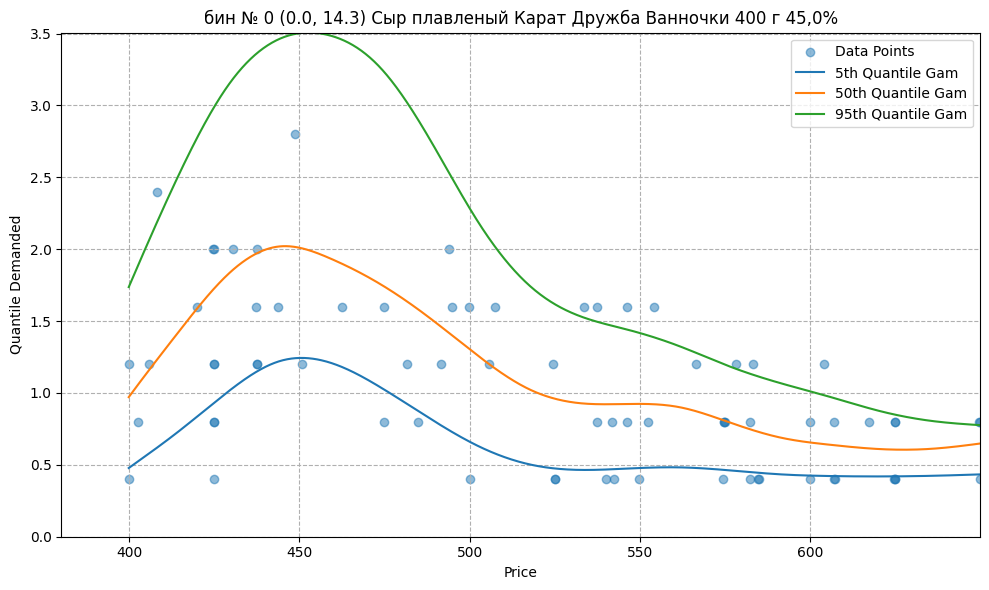

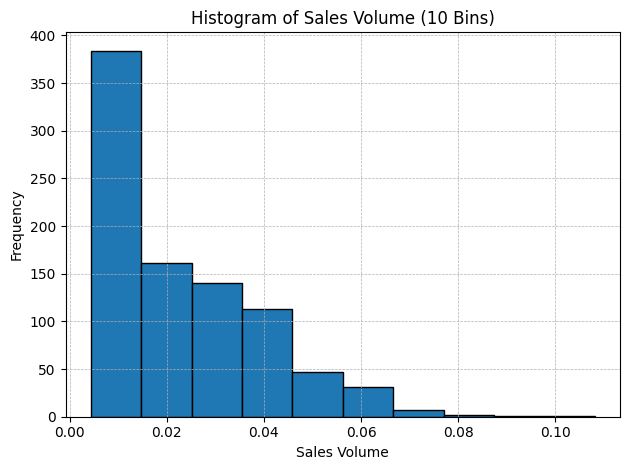

Интервалы бинов share vol 0.004381869759111805 0.03550589367440207
количево код тт 237
['9179', 'L787', 'J240', '30RZ', '37C0', 'O240', '8240', 'S940', 'X339', 'X095']


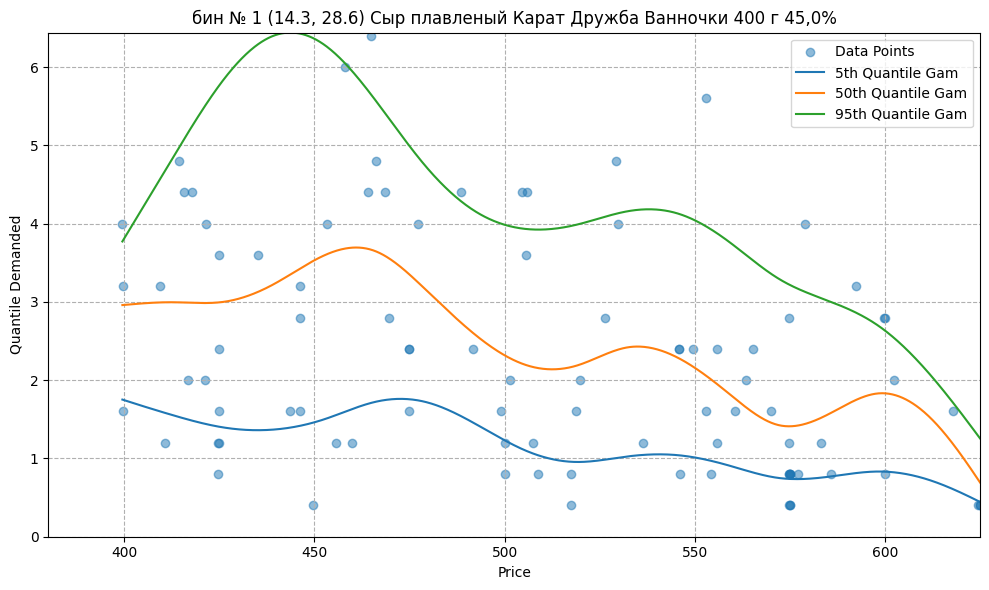

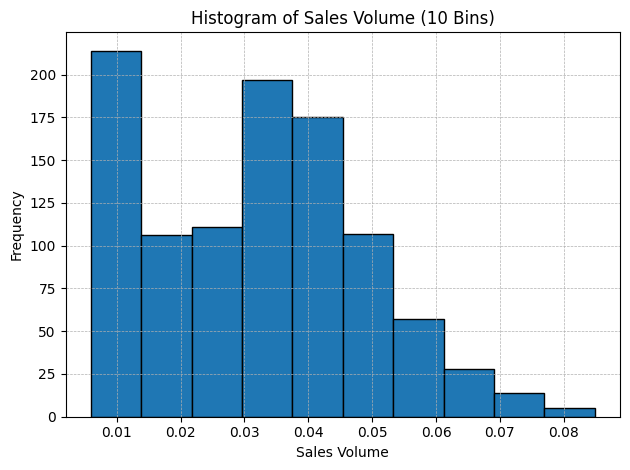

Интервалы бинов share vol 0.021735070295324288 0.04540790466704824
количево код тт 480
['X963', '30IN', 'Q023', 'L599', '8965', 'O914', 'J910', 'H621', '8586', '8585']


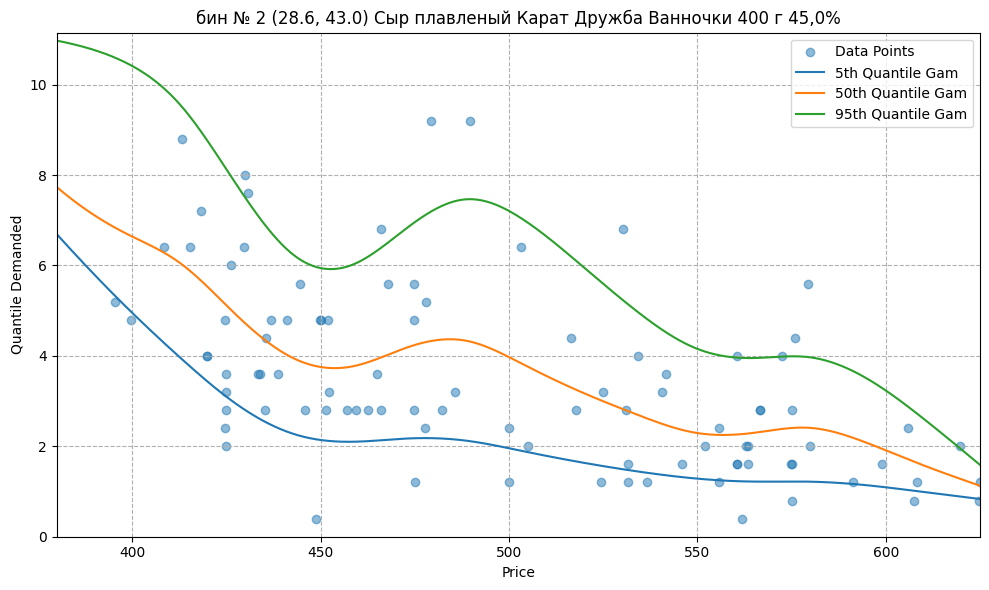

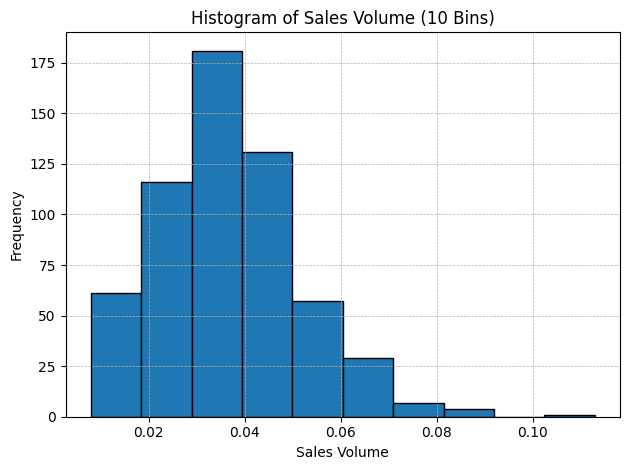

Интервалы бинов share vol 0.01847196114422682 0.04994943847578018
количево код тт 424
['30XF', '5403', 'Y322', 'H838', '4398', 'O696', '30IK', 'J373', 'E923', '30MG']


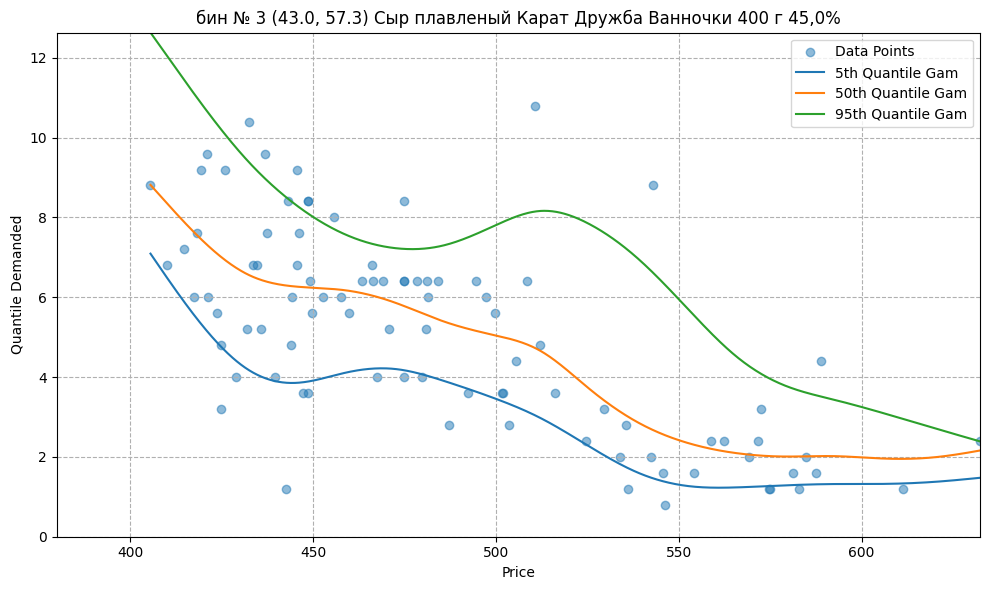

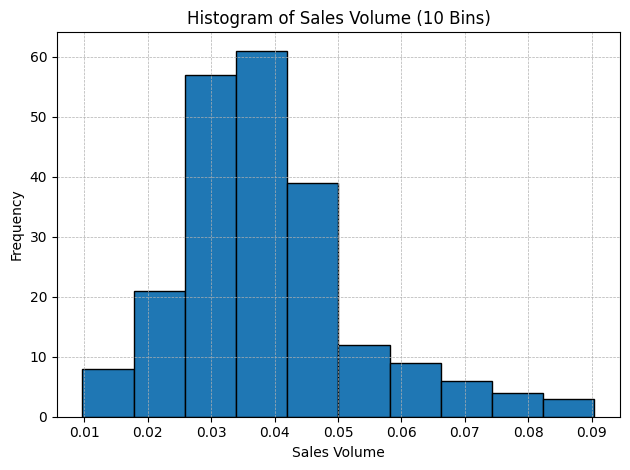

Интервалы бинов share vol 0.02586992649725122 0.0500726278748981
количево код тт 157
['J604', '3846', '317Z', '4691', 'S250', 'L984', '31RL', 'E342', 'O407', '4190']


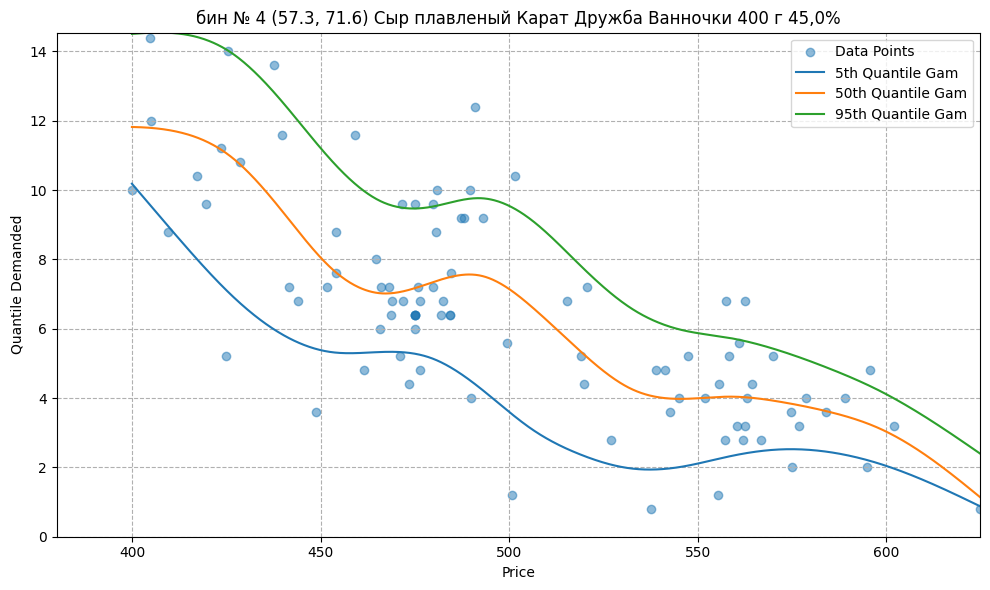

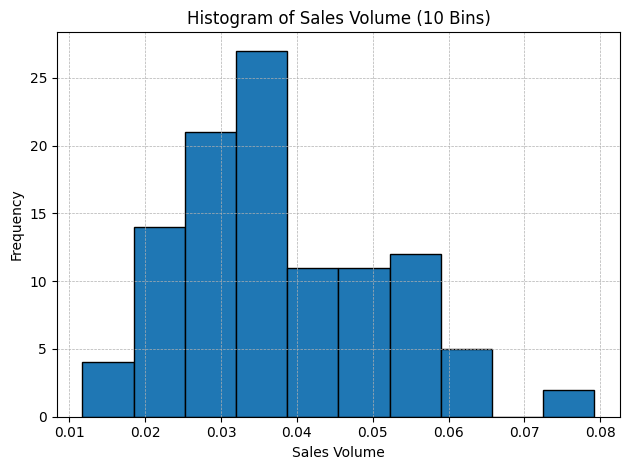

Интервалы бинов share vol 0.025222336245532086 0.045480776375343104
количево код тт 59
['7005', '8740', '8828', '8899', '4399', '9543', 'O435', '3898', '34Y4', '4541']


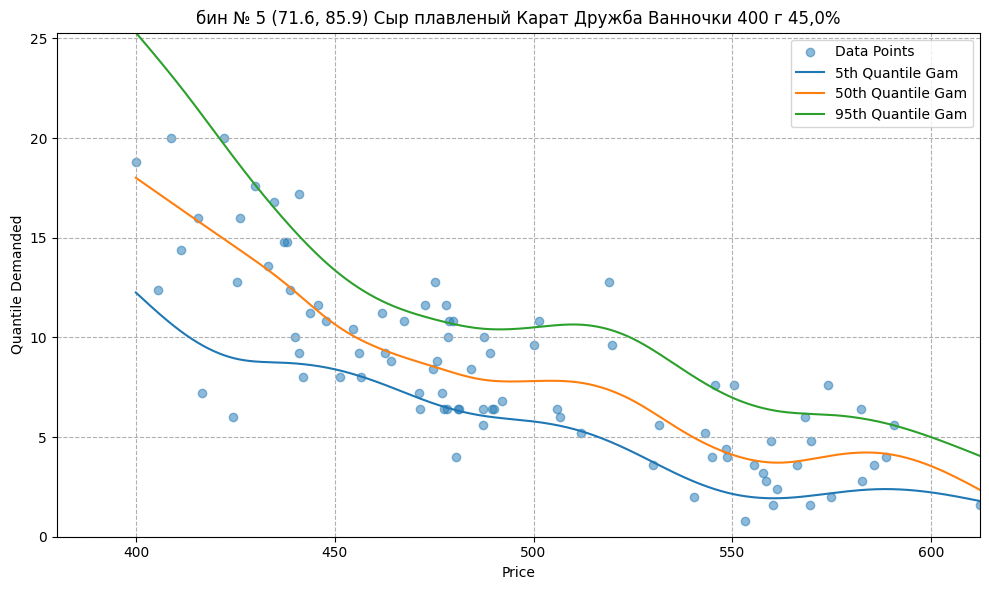

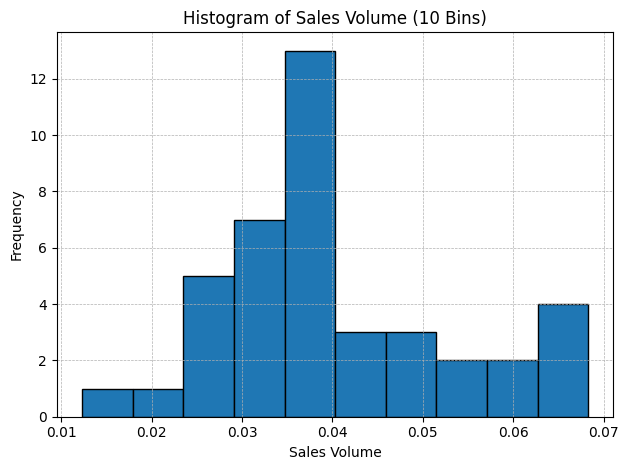

Интервалы бинов share vol 0.02910645583588618 0.04590038791595413
количево код тт 23
['9632', '31I7', '9321', '4229', 'J162', '4625', 'D440', '5335', '345U', '4250']


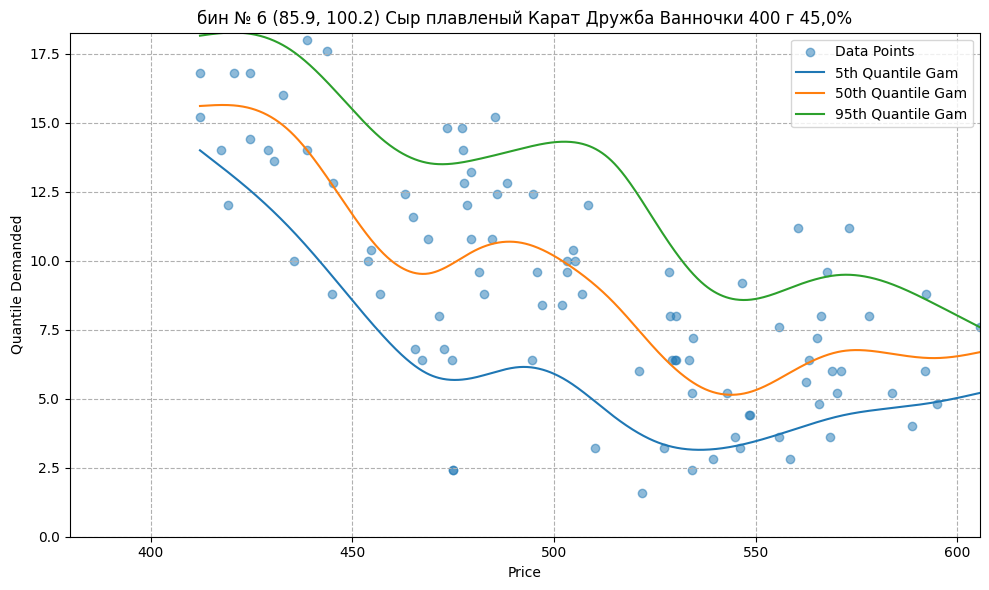

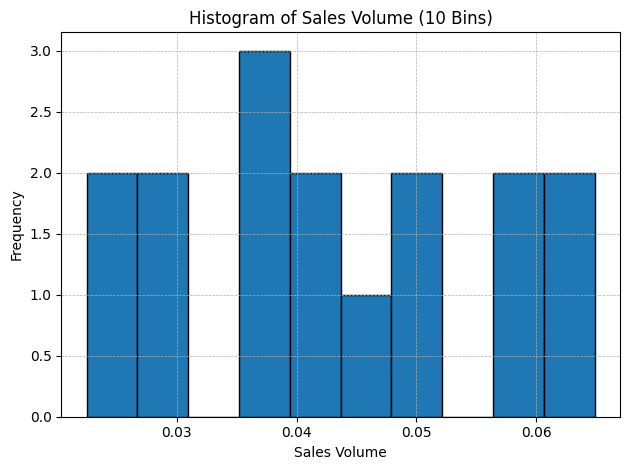

Интервалы бинов share vol 0.030969770490102595 0.04368007959569667
количево код тт 5
['3513', '3847', '8112', '9558', 'S633']


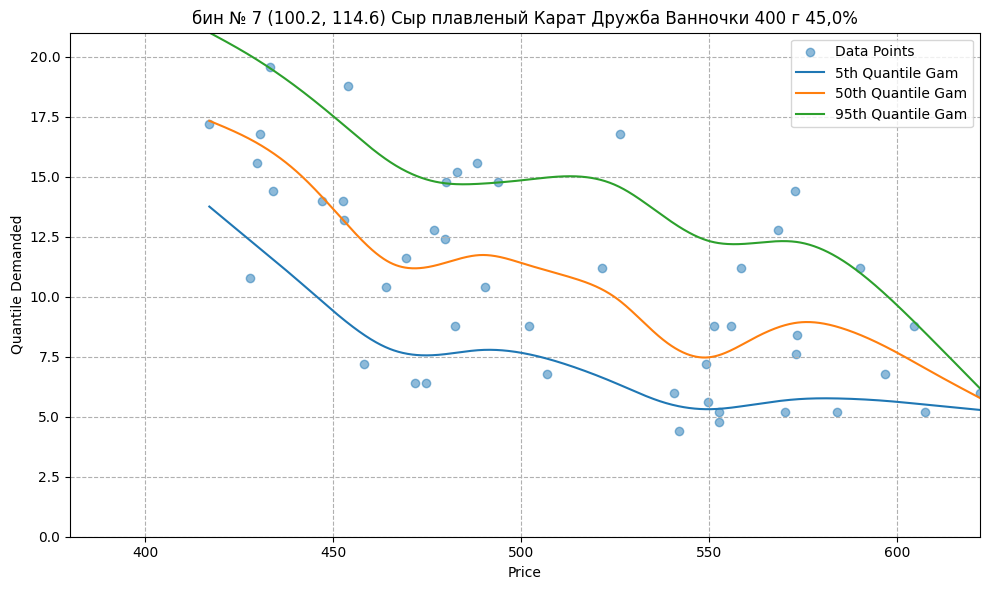

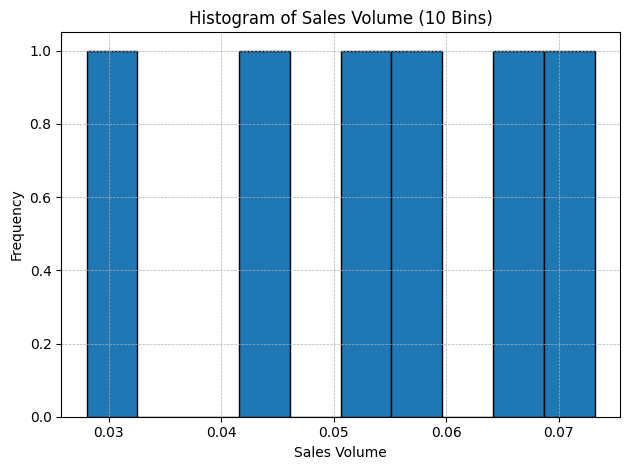

Интервалы бинов share vol 0.03707594506057413 0.05062290948779169
количево код тт 1
['J021']
did not converge


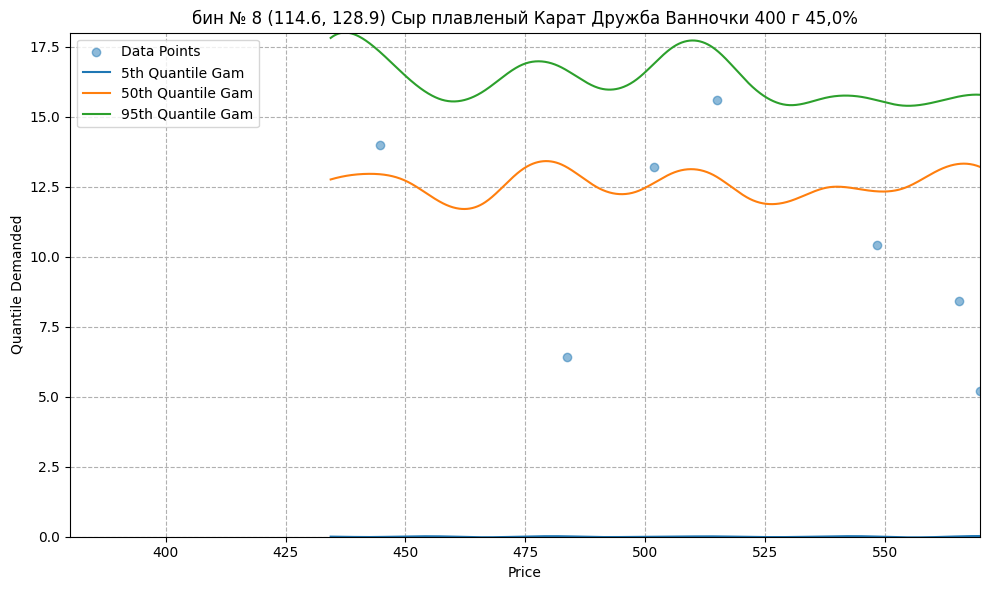

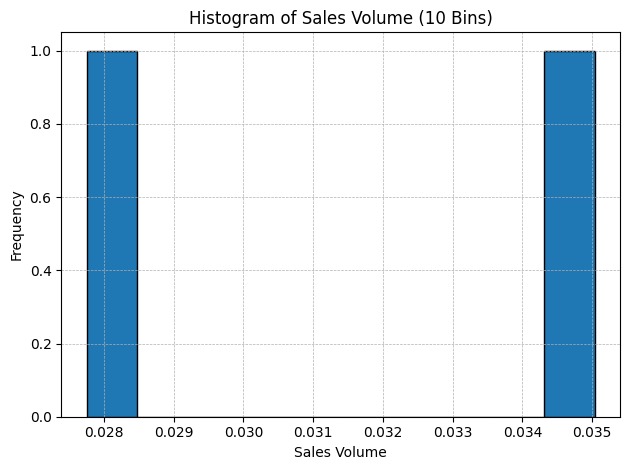

Интервалы бинов share vol 0.03357943109337466 0.03503638235481478
количево код тт 1
['J502']
did not converge


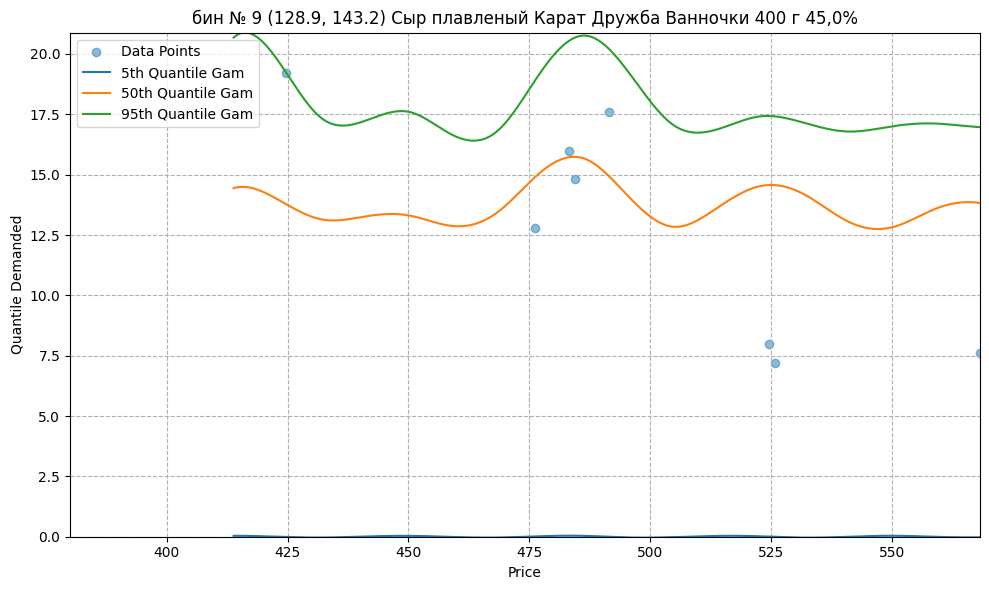

In [58]:
lw = bin_edges.tolist()
for i in range(len(lw)):
  if i != len(lw)-1:
    # print('Интервалы бинов sales vol',lw[i],lw[i+1])
    merdge_df = df[(df["SALES VOL"] >= lw[i]) & (df["SALES VOL"] <= lw[i+1])]
    plt_2=plt
    counts_sh, bin_edges_sh, _ = plt_2.hist(merdge_df["SHARE VOL"], bins=10, edgecolor='black')
    plt_2.xlabel('Sales Volume')
    plt_2.ylabel('Frequency')
    plt_2.title('Histogram of Sales Volume (10 Bins)')

    # Добавляем сетку
    plt_2.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Отображаем гистограмму
    plt_2.tight_layout()
    plt.show()


    # Находим индекс бина с максимальным количеством
    # print('до',counts_sh)

    max_bin_index_sh = counts_sh.argmax()


    if  max_bin_index_sh ==0:



      # mask = np.delete(counts_sh, max_bin_index_sh)
      counts_sh[max_bin_index_sh] = 0

        # Применяем маску для создания нового массива без удаляемых элементов
      counts_sh_new = counts_sh

    else:
      counts_sh_new = counts_sh



    # print('после',counts_sh_new)
    max_bin_index_sh = counts_sh_new.argmax()
    # print('после индекс',max_bin_index_sh)

    # Находим 4 бина вправо и 4 бина влево от самого высокого бина
    # Проверяем, чтобы индексы не выходили за пределы массива
    left_index_sh = max(0, max_bin_index_sh - 1)
    right_index_sh = min(len(bin_edges_sh) - 1, max_bin_index_sh + 2)

    # Получаем границы диапазона
    bin_start_sh = bin_edges_sh[left_index_sh]
    bin_end_sh = bin_edges_sh[right_index_sh]
    print('Интервалы бинов share vol',bin_start_sh, bin_end_sh)
    plt_2.close()
    mergde_df_2= merdge_df[(merdge_df["SHARE VOL"] >= bin_start_sh) & (merdge_df["SHARE VOL"] <= bin_end_sh)]
    lst= mergde_df_2['Kod_TT'].unique().tolist()

    df_kod_TT_all = df_all[df_all['Kod_TT'].isin(lst)]

    filtered_df = df_kod_TT_all.groupby("Kod_TT").filter(lambda x: len(x) >= 5)
    print('количево код тт',len(filtered_df['Kod_TT'].unique().tolist()))

    import random

    # Получаем список уникальных значений Kod_TT
    unique_kod_tt = filtered_df['Kod_TT'].unique().tolist()

    # Случайным образом выбираем 10 значений из списка
    if len(unique_kod_tt) >=10:
      # Случайным образом выбираем 10 значений из списка
      random_kod_tt = random.sample(unique_kod_tt, 10)
    else:
      random_kod_tt = unique_kod_tt

    print(random_kod_tt)


    # lst_1= filtered_df['Kod_TT'].unique().tolist()[:10]
    filtered_df_2 = df_all[df_all['Kod_TT'].isin(random_kod_tt)]

    X = pd.DataFrame({'Price': filtered_df_2['PRICE PER UNIT'].tolist()})
    y = pd.DataFrame({'Sales': filtered_df_2['SALES VOL'].tolist()})
    quantiles = [0.05, 0.5, 0.95]
    gam_res = {}
    for q in quantiles:
        gam = ExpectileGAM(s(0), expectile=q)
        gam.fit(X, y)
        gam_res[q] = gam

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, label='Data Points')
    XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    for q, gam in gam_res.items():
        plt.plot(XX, gam.predict(XX), label=f'{int(q * 100)}th Quantile Gam')
    plt.xlim(380, XX.max())
    plt.ylim(0, gam.predict(XX).max())
    plt.xlabel('Price')
    plt.ylabel('Quantile Demanded')
    plt.title(f'бин № {i} {round(lw[i],1),round(lw[i+1],1)} Сыр плавленый Карат Дружба Ванночки 400 г 45,0%')
    plt.grid(True, which='both', linestyle='--')
    plt.legend()
    plt.tight_layout()

    plt.show()
    plt.close()



In [ ]:
# lw = bin_edges.tolist()
# for i in range(len(lw)):
#   if i != len(lw)-1:
#     # print('Интервалы бинов sales vol',lw[i],lw[i+1])
#     merdge_df = df[(df["SALES VOL"] >= lw[i]) & (df["SALES VOL"] <= lw[i+1])]
#     plt_2=plt
#     counts_sh, bin_edges_sh, _ = plt_2.hist(merdge_df["SHARE VOL"], bins=10, edgecolor='black')
#     plt_2.xlabel('Sales Volume')
#     plt_2.ylabel('Frequency')
#     plt_2.title('Histogram of Sales Volume (10 Bins)')

#     # Добавляем сетку
#     plt_2.grid(True, which='both', linestyle='--', linewidth=0.5)

#     # Отображаем гистограмму
#     plt_2.tight_layout()
#     plt.show()


#     # Находим индекс бина с максимальным количеством
#     max_bin_index_sh = counts_sh.argmax()

#     # Находим 4 бина вправо и 4 бина влево от самого высокого бина
#     # Проверяем, чтобы индексы не выходили за пределы массива
#     left_index_sh = max(0, max_bin_index_sh - 1)
#     right_index_sh = min(len(bin_edges_sh) - 1, max_bin_index_sh + 2)

#     # Получаем границы диапазона
#     bin_start_sh = bin_edges_sh[left_index_sh]
#     bin_end_sh = bin_edges_sh[right_index_sh]
#     print('Интервалы бинов share vol',bin_start_sh, bin_end_sh)
#     plt_2.close()
#     mergde_df_2= merdge_df[(merdge_df["SHARE VOL"] >= bin_start_sh) & (merdge_df["SHARE VOL"] <= bin_end_sh)]
#     lst= mergde_df_2['Kod_TT'].unique().tolist()

#     df_kod_TT_all = df_all[df_all['Kod_TT'].isin(lst)]

#     filtered_df = df_kod_TT_all.groupby("Kod_TT").filter(lambda x: len(x) >= 5)
#     print('количево код тт',len(filtered_df['Kod_TT'].unique().tolist()))
#     lst_1= filtered_df['Kod_TT'].unique().tolist()[:10]
#     filtered_df_2 = df_all[df_all['Kod_TT'].isin(lst_1)]

#     X = pd.DataFrame({'Price': filtered_df_2['PRICE PER UNIT'].tolist()})
#     y = pd.DataFrame({'Sales': filtered_df_2['SALES VOL'].tolist()})
#     quantiles = [0.05, 0.5, 0.95]
#     gam_res = {}
#     for q in quantiles:
#         gam = ExpectileGAM(s(0), expectile=q)
#         gam.fit(X, y)
#         gam_res[q] = gam

#     plt.figure(figsize=(10, 6))
#     plt.scatter(X, y, alpha=0.5, label='Data Points')
#     XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
#     for q, gam in gam_res.items():
#         plt.plot(XX, gam.predict(XX), label=f'{int(q * 100)}th Quantile Gam')
#     plt.xlim(0, XX.max())
#     plt.ylim(0, gam.predict(XX).max())
#     plt.xlabel('Price')
#     plt.ylabel('Quantile Demanded')
#     plt.title(f'бин № {i} {round(lw[i],1),round(lw[i+1],1)} Сыр плавленый Карат Дружба Ванночки 400 г 45,0%')
#     plt.grid(True, which='both', linestyle='--')
#     plt.legend()
#     plt.tight_layout()

#     plt.show()
#     plt.close()

